# Calculate Z_in for the following circuit

<img src="Circuit_Lab5.png">

## Imports and function definitions

In [1]:
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pprint
pp = pprint.PrettyPrinter(indent=1)

In [2]:
l3_ft = 25.
ft_to_m = 0.3048
l3_m = l3_ft * ft_to_m

In [17]:
def wavelength_m(freq_Hz):
    return 2e8/freq_Hz

wavelength_m_vec = np.vectorize(wavelength_m)

def beta(freq_Hz):
    return 2*cmath.pi/wavelength_m(freq_Hz)

def gamma_L(Z0, ZL):
    if ZL == 0:
        return -1.0
    elif ZL == 'infinite' or ZL == 'open':
        return 1.0
    else:
        return (ZL - Z0)/(ZL + Z0)

def gamma_in(Z0, ZL, l_m, wavelength_m):
    gamma_load = gamma_L(Z0, ZL)
    beta = 2*cmath.pi/wavelength_m
    temp = gamma_load * cmath.exp(-1j * 2 * beta * l_m)
    return temp

def input_impedance(Z0, ZL, l_m, wavelength_m):
    temp = gamma_in(Z0, ZL, l_m, wavelength_m)
    return Z0 * (1 + temp) / (1 - temp)
    
def z_parallel(Z1, Z2):
    return Z1*Z2 / (Z1 + Z2)

def do_calcs_for_line(d, key):
    d[key]['gamma_L'] = gamma_L(d[key]['Z0'], d[key]['Z_Load'])
    d[key]['gamma_in'] = gamma_in(d[key]['Z0'], d[key]['Z_Load'], 
                                  d[key]['length_m'], 
                                  d['wavelength_m'] )
    d[key]['Z_in'] = input_impedance(d[key]['Z0'], d[key]['Z_Load'], 
                                  d[key]['length_m'], 
                                  d['wavelength_m'] )

def calc_v0plus(d, f, V_g, Z_g):
    d['V_g'] = V_g
    d['Z_g'] = Z_g
    d['V_in'] = V_g * d['line3']['Z_in'] / (Z_g + d['line3']['Z_in'])
    d['V_0_plus'] = d['V_in'] * cmath.exp(-1j * beta(f) * d['line3']['length_m']) / (1.0 + d['line3']['gamma_in'])
    

def calc_V_z(V_0_plus, beta, gamma_L, z):
    return V_0_plus * cmath.exp(-1j * beta * z) + gamma_L * V_0_plus * cmath.exp(1j * beta * z)
    

def do_calcs(d):
    do_calcs_for_line(d, 'line1')
    do_calcs_for_line(d, 'line2')
    d['line3']['Z_Load'] = z_parallel(d['line1']['Z_in'], d['line2']['Z_in'])
    do_calcs_for_line(d, 'line3')


def make_dict_for_freq(f, Z1_Load, Z2_Load):
    velocity_mpers = 2.0e8
    d = {
        'frequency_Hz':f,
        'wavelength_m':velocity_mpers/f,
        'line1':{
            'Z0':50.,
            'Z_Load':Z1_Load,
            'length_m':1.0,
        },
        'line2':{
            'Z0':50.,
            'Z_Load':Z2_Load,
            'length_m':1.0,
        },
        'line3':{
            'Z0':50.,
            'length_m':l3_m,
        },
    }    
    return d

def make_dict_and_print(f, Z1_Load, Z2_Load):
    temp = make_dict_for_freq(f, Z1_Load, 'infinite')
    do_calcs(temp)
    pp.pprint(temp)
    print('\n')
    return temp

def print_results(r):
    print('  f (Hz)    lambda (m)   Z_in (line 1)       Z_in (line 2)   Z_Load (line 3)     Z_in (line 3)')
    for d in r:
        print('{:10.1f}   {:6.1f}      {:5.3f}       {:5.3f}    {:5.3f}        {:5.3f}'.format(d['frequency_Hz'],
                                                                                       d['wavelength_m'],
                                                                                       d['line1']['Z_in'],
                                                                                       d['line2']['Z_in'],
                                                                                       d['line3']['Z_Load'],
                                                                                       d['line3']['Z_in']) )    

# Develop calculation for V_0_plus

In [18]:
f = 0.1e6
Z1_Load = 25.0
V_g = 1.0
Z_g = 50.0

temp = make_dict_for_freq(f, Z1_Load, 'infinite')
do_calcs(temp)

calc_v0plus(temp, f, V_g, Z_g)
pp.pprint(temp)

{'V_0_plus': (0.499856738677345-0.011968324813793521j),
 'V_g': 1.0,
 'V_in': (0.3335628443657501+0.008673669317393542j),
 'Z_g': 50.0,
 'frequency_Hz': 100000.0,
 'line1': {'Z0': 50.0,
           'Z_Load': 25.0,
           'Z_in': (25.00018505584353+0.11780982140361027j),
           'gamma_L': -0.3333333333333333,
           'gamma_in': (-0.33332675361871233+0.0020943813218529837j),
           'length_m': 1.0},
 'line2': {'Z0': 50.0,
           'Z_Load': 'infinite',
           'Z_in': (3.67617902513294e-11-15915.441949277521j),
           'gamma_L': 1.0,
           'gamma_in': (0.9999802608561371-0.006283143965558951j),
           'length_m': 1.0},
 'line3': {'Z0': 50.0,
           'Z_Load': (25.00049348590228+0.07853929954653503j),
           'Z_in': (25.013122423552122+0.9762946331343648j),
           'gamma_L': (-0.3333230981944429+0.0013962343090594624j),
           'gamma_in': (-0.3328743112684997+0.017347338634787084j),
           'length_m': 7.62},
 'wavelength_m': 2000.0}


In [19]:
calc_V_z(temp['V_0_plus'], beta(temp['frequency_Hz']), temp['line3']['gamma_L'], -temp['line3']['length_m'])

(0.3335628443657501+0.00867366931739354j)

In [20]:
abs(calc_V_z(temp['V_0_plus'], beta(temp['frequency_Hz']), temp['line3']['gamma_L'], -temp['line3']['length_m']))

0.33367559647177847

# Plot voltage at oscilloscope vs frequency

## Z_1 = 25 Ohms

In [40]:
Z1_Load = 25.0
V_g = 1.0
Z_g = 50.0
freq_max = 20e6

temp1 = np.array([0.1e6])
temp2 = np.arange(1e6, freq_max+0.5e6, 0.5e6)
frequencies = np.concatenate( (temp1, temp2), axis=0 )

voltage_phasor_25 = []

for i,f in enumerate(frequencies):
    temp = make_dict_for_freq(f, Z1_Load, 'infinite')
    do_calcs(temp)
    calc_v0plus(temp, f, V_g, Z_g)
    temp['voltage_phasor_magn'] = abs(calc_V_z(temp['V_0_plus'], beta(temp['frequency_Hz']), temp['line3']['gamma_L'], -temp['line3']['length_m']))
    voltage_phasor_25.append(temp)

pp.pprint(voltage_phasor_25)

[{'V_0_plus': (0.499856738677345-0.011968324813793521j),
  'V_g': 1.0,
  'V_in': (0.3335628443657501+0.008673669317393542j),
  'Z_g': 50.0,
  'frequency_Hz': 100000.0,
  'line1': {'Z0': 50.0,
            'Z_Load': 25.0,
            'Z_in': (25.00018505584353+0.11780982140361027j),
            'gamma_L': -0.3333333333333333,
            'gamma_in': (-0.33332675361871233+0.0020943813218529837j),
            'length_m': 1.0},
  'line2': {'Z0': 50.0,
            'Z_Load': 'infinite',
            'Z_in': (3.67617902513294e-11-15915.441949277521j),
            'gamma_L': 1.0,
            'gamma_in': (0.9999802608561371-0.006283143965558951j),
            'length_m': 1.0},
  'line3': {'Z0': 50.0,
            'Z_Load': (25.00049348590228+0.07853929954653503j),
            'Z_in': (25.013122423552122+0.9762946331343648j),
            'gamma_L': (-0.3333230981944429+0.0013962343090594624j),
            'gamma_in': (-0.3328743112684997+0.017347338634787084j),
            'length_m': 7.62},
  'vol

  'Z_g': 50.0,
  'frequency_Hz': 6500000.0,
  'line1': {'Z0': 50.0,
            'Z_Load': 25.0,
            'Z_in': (25.79558791903867+7.683497497297676j),
            'gamma_L': -0.3333333333333333,
            'gamma_in': (-0.305918208561327+0.13238263021159352j),
            'length_m': 1.0},
  'line2': {'Z0': 50.0,
            'Z_Load': 'infinite',
            'Z_in': (8.577702729782218e-15-241.440867609638j),
            'gamma_L': 1.0,
            'gamma_in': (0.9177546256839811-0.39714789063478056j),
            'length_m': 1.0},
  'line3': {'Z0': 50.0,
            'Z_Load': (27.188150620138266+4.935784363897074j),
            'Z_in': (89.83076672376129-14.606896445415687j),
            'gamma_L': (-0.2902598392451368+0.08250546604298332j),
            'gamma_in': (0.2925693962014237-0.07389908397210955j),
            'length_m': 7.62},
  'voltage_phasor_magn': 0.6473400803689723,
  'wavelength_m': 30.76923076923077},
 {'V_0_plus': (-0.05236837657612646-0.49724999058298747j),
  

  'line1': {'Z0': 50.0,
            'Z_Load': 25.0,
            'Z_in': (31.860639652077126+21.621276499553197j),
            'gamma_L': -0.3333333333333333,
            'gamma_in': (-0.14192643052169088+0.3016090174886732j),
            'length_m': 1.0},
  'line2': {'Z0': 50.0,
            'Z_Load': 'infinite',
            'Z_in': (-5.5981809764512426e-15-78.78739299843254j),
            'gamma_L': 1.0,
            'gamma_in': (0.42577929156507266-0.9048270524660196j),
            'length_m': 1.0},
  'line3': {'Z0': 50.0,
            'Z_Load': (46.17567601045938+4.063551083486959j),
            'Z_in': (56.14395833356862-0.3341329802130184j),
            'gamma_L': (-0.03791108827098601+0.043853133164855715j),
            'gamma_in': (0.05789259569721318-0.002965681322070004j),
            'length_m': 7.62},
  'voltage_phasor_magn': 0.5289483763319183,
  'wavelength_m': 11.111111111111111},
 {'V_0_plus': (-0.13994801873639034+0.48001515814790574j),
  'V_g': 1.0,
  'V_in': (0.519198184

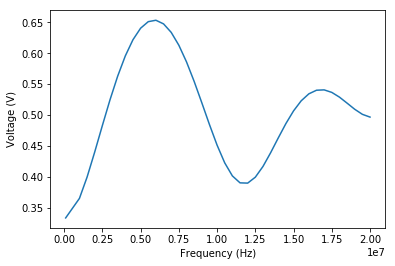

In [41]:
freqs = []
voltage_phasor_magnitudes = []
for d in voltage_phasor_25:
    freqs.append(d['frequency_Hz'])
    voltage_phasor_magnitudes.append(d['voltage_phasor_magn'])

fig, ax = plt.subplots()
ax.plot(freqs, voltage_phasor_magnitudes)
# ax.plot(frequencies, voltage_phasor_magnitudes)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Voltage (V)')

## Z_1 = 50 Ohms

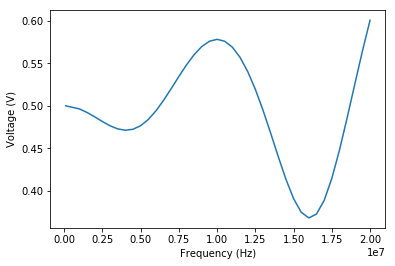

In [46]:
Z1_Load = 50.0
V_g = 1.0
Z_g = 50.0
freq_max = 20e6

temp1 = np.array([0.1e6])
temp2 = np.arange(1e6, freq_max+0.5e6, 0.5e6)
frequencies = np.concatenate( (temp1, temp2), axis=0 )

voltage_phasor_50 = []

for i,f in enumerate(frequencies):
    temp = make_dict_for_freq(f, Z1_Load, 'infinite')
    do_calcs(temp)
    calc_v0plus(temp, f, V_g, Z_g)
    temp['voltage_phasor_magn'] = abs(calc_V_z(temp['V_0_plus'], beta(temp['frequency_Hz']), temp['line3']['gamma_L'], -temp['line3']['length_m']))
    voltage_phasor_50.append(temp)

freqs = []
voltage_phasor_magnitudes = []
for d in voltage_phasor_50:
    freqs.append(d['frequency_Hz'])
    voltage_phasor_magnitudes.append(d['voltage_phasor_magn'])

fig, ax = plt.subplots()
ax.plot(freqs, voltage_phasor_magnitudes)
# ax.plot(frequencies, voltage_phasor_magnitudes)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Voltage (V)')

# Manual calculations

## Define frequencies

In [4]:
frequencies = [0.1e6, 5e6, 20e6]

## Z_1 = 50 Ohms

### Calculations and print everything

In [5]:
Z1_Load = 50.0
results_50 = []
for i,f in enumerate(frequencies):
    results_50.append(make_dict_and_print(f, Z1_Load, 'infinite'))

{'frequency_Hz': 100000.0,
 'line1': {'Z0': 50.0,
           'Z_Load': 50.0,
           'Z_in': (50+0j),
           'gamma_L': 0.0,
           'gamma_in': 0j,
           'length_m': 1.0},
 'line2': {'Z0': 50.0,
           'Z_Load': 'infinite',
           'Z_in': (3.67617902513294e-11-15915.441949277521j),
           'gamma_L': 1.0,
           'gamma_in': (0.9999802608561371-0.006283143965558951j),
           'length_m': 1.0},
 'line3': {'Z0': 50.0,
           'Z_Load': (49.99950652140343-0.1570785991389738j),
           'Z_in': (49.9919902922275-0.15686320561289757j),
           'gamma_L': (-2.4674112470342486e-06-0.0015707976187148034j),
           'gamma_in': (-7.764230195323664e-05-0.0015688795109968649j),
           'length_m': 7.62},
 'wavelength_m': 2000.0}


{'frequency_Hz': 5000000.0,
 'line1': {'Z0': 50.0,
           'Z_Load': 50.0,
           'Z_in': (50+0j),
           'gamma_L': 0.0,
           'gamma_in': 0j,
           'length_m': 1.0},
 'line2': {'Z0': 50.0,
           '

### Print just the main results

In [6]:
print_results(results_50)

  f (Hz)    lambda (m)   Z_in (line 1)       Z_in (line 2)   Z_Load (line 3)     Z_in (line 3)
  100000.0   2000.0      50.000+0.000j       0.000-15915.442j    50.000-0.157j        49.992-0.157j
 5000000.0     40.0      50.000+0.000j       0.000-315.688j    48.776-7.725j        45.003+5.610j
20000000.0     10.0      50.000+0.000j       0.000-68.819j    32.725-23.776j        55.938+37.962j


## Z_1 = 25 Ohms

### Calculations and print everything

In [7]:
Z1_Load = 25.0
results_25 = []
for i,f in enumerate(frequencies):
    results_25.append(make_dict_and_print(f, Z1_Load, 'infinite'))

{'frequency_Hz': 100000.0,
 'line1': {'Z0': 50.0,
           'Z_Load': 25.0,
           'Z_in': (25.00018505584353+0.11780982140361027j),
           'gamma_L': -0.3333333333333333,
           'gamma_in': (-0.33332675361871233+0.0020943813218529837j),
           'length_m': 1.0},
 'line2': {'Z0': 50.0,
           'Z_Load': 'infinite',
           'Z_in': (3.67617902513294e-11-15915.441949277521j),
           'gamma_L': 1.0,
           'gamma_in': (0.9999802608561371-0.006283143965558951j),
           'length_m': 1.0},
 'line3': {'Z0': 50.0,
           'Z_Load': (25.00049348590228+0.07853929954653503j),
           'Z_in': (25.013122423552122+0.9762946331343648j),
           'gamma_L': (-0.3333230981944429+0.0013962343090594624j),
           'gamma_in': (-0.3328743112684997+0.017347338634787084j),
           'length_m': 7.62},
 'wavelength_m': 2000.0}


{'frequency_Hz': 5000000.0,
 'line1': {'Z0': 50.0,
           'Z_Load': 25.0,
           'Z_in': (25.467424172496624+5.902400154192592j),


### Print just the main results

In [8]:
print_results(results_50)

  f (Hz)    lambda (m)   Z_in (line 1)       Z_in (line 2)   Z_Load (line 3)     Z_in (line 3)
  100000.0   2000.0      50.000+0.000j       0.000-15915.442j    50.000-0.157j        49.992-0.157j
 5000000.0     40.0      50.000+0.000j       0.000-315.688j    48.776-7.725j        45.003+5.610j
20000000.0     10.0      50.000+0.000j       0.000-68.819j    32.725-23.776j        55.938+37.962j


In [9]:
print_results(results_25)

  f (Hz)    lambda (m)   Z_in (line 1)       Z_in (line 2)   Z_Load (line 3)     Z_in (line 3)
  100000.0   2000.0      25.000+0.118j       0.000-15915.442j    25.000+0.079j        25.013+0.976j
 5000000.0     40.0      25.467+5.902j       0.000-315.688j    26.270+3.855j        80.751+28.829j
20000000.0     10.0      33.744+24.069j       0.000-68.819j    50.876-1.348j        49.307+1.423j
